In [1]:
import numpy as np
import random
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats
import astroML.stats
from sklearn.neighbors import KernelDensity
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.metrics import confusion_matrix
from scipy.stats import norm
# from sklearn.neighbors import KernelDensity

from astropy.visualization import hist

In [121]:
import requests
import numpy as np
# Download file
r = requests.get('https://user-web.icecube.wisc.edu/~grbweb_public/Summary_table.txt')
with open("Summary_table.txt", 'wb') as f:
    f.write(r.content)

# Read content
data = np.loadtxt("Summary_table.txt", dtype='str',unpack='True')

# Read headers
with open("Summary_table.txt",'r') as f:
    names= np.array([n.strip().replace(" ","_") for n in f.readlines()[1].replace("#","").replace("\n","").lstrip().split('    ') if n.strip()!=''])
data.shape

(15, 8803)

[-999. -999. -999. ... -999. -999. -999.]


(array([27., 13., 17., 29., 26., 24., 24., 27., 29., 25., 24., 25., 27.,
        27., 13., 14., 14., 14., 22., 14., 12., 20., 20., 11., 15., 12.,
         7.,  8.,  7.,  7., 10.,  8.,  9.,  3.,  6.,  5.,  9.,  3.,  3.,
         2.,  3.,  3.,  6.,  2.,  3.,  3.,  1.,  3.,  1.,  0.,  3.,  1.,
         0.,  1.,  1.,  1.,  0.,  2.,  0.,  1.,  0.,  1.,  0.,  0.,  0.,
         0.,  0.,  0.,  1.,  0.,  1.,  1.,  1.,  0.,  0.,  0.,  0.,  1.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([8.5000000e-03, 1.1841500e-01, 2.2833000e-01, 3.3824500e-01,
        4.4816000e-01, 5.5807500e-01, 6.6799000e-01, 7.7790500e-01,
        8.8782000e-01, 9.9773500e-01, 1.1076500e+00, 1.2175650e+00,
        1.3274800e+00, 1.4373950e+00, 1.5473100e+00, 1.6572250e+00,
        1.7671400e+00, 1.8770550e+00, 1.9869700e+00, 2.0968850e+00,
        2.2068000e+00, 2.3167150e+00, 2.4266300e+00, 2.5365450e+00,
        2.6464600e+00, 2.7

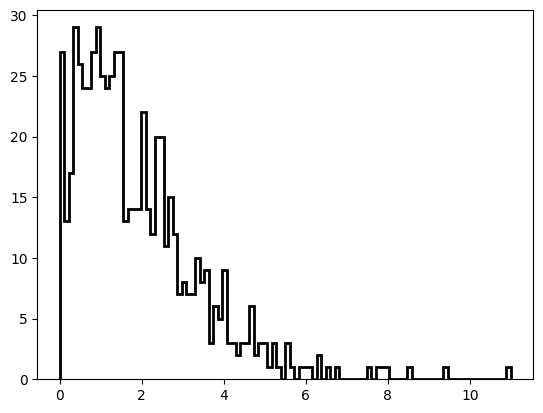

In [126]:
grb=dict(zip(names,data))

for lab in ['T90',"redshift","T90_error"]:
    grb[lab] = np.array(grb[lab],dtype='float')

print(grb["redshift"])
redshift = np.array(grb["redshift"], dtype=float)
plt.hist(redshift[redshift>-990], bins=100, histtype='step', color='black', lw=2)

In [119]:
import numpy as np
import requests
from io import StringIO

# Scarica il contenuto
url = 'https://user-web.icecube.wisc.edu/~grbweb_public/Summary_table.txt'
r = requests.get(url)

# Decodifica il contenuto come testo
text = r.content.decode('utf-8')

# Converte in un file-like oggetto
f = StringIO(text)

# Legge tutto il contenuto in righe
lines = f.readlines()

# Estrai intestazioni dalla seconda riga (indice 1)
headers = [h.strip().replace(" ", "_") for h in lines[1].strip().replace("#", "").split("    ") if h.strip() != ""]

# Leggi i dati, saltando le prime due righe (commento + header)
data = np.genfromtxt(lines[2:], dtype='str', unpack=True)

print("Header columns:", headers)
print("Shape of data:", data.shape)


Header columns: ['GRB_name', 'GRB_name_Fermi', 'T0', 'ra', 'decl', 'pos_error', 'T90', 'T90_error', 'T90_start', 'fluence', 'fluence_error', 'redshift', "'T100'", 'GBM_located', 'mjd_(T0)']
Shape of data: (15, 8803)


In [168]:
T90=np.array(data[6],dtype=float)
t90= T90[T90 >= 0]

T90_log = np.log10(t90[:,np.newaxis])

[]

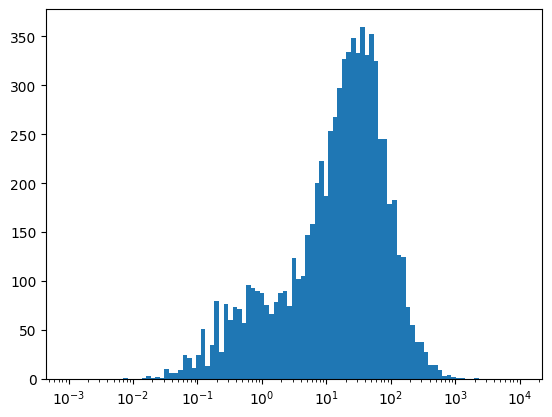

In [169]:
plt.hist(T90,bins= np.logspace(-3,4,100))
plt.semilogx()

(array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   1.,   0.,   0.,   0.,   1.,   3.,   1.,   2.,   1.,  10.,
          6.,   6.,   9.,  24.,  21.,  11.,  24.,  51.,  13.,  34.,  79.,
         27.,  76.,  60.,  73.,  71.,  57.,  96.,  93.,  90.,  88.,  75.,
         66.,  78.,  88.,  90.,  74., 123., 102., 105., 147., 158., 200.,
        223., 187., 253., 268., 297., 327., 334., 348., 333., 360., 331.,
        353., 325., 245., 245., 179., 183., 126., 124.,  73.,  55.,  38.,
         38.,  27.,  14.,  14.,   9.,   3.,   4.,   2.,   1.,   1.,   0.,
          0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.]),
 array([1.00000000e-03, 1.17681195e-03, 1.38488637e-03, 1.62975083e-03,
        1.91791026e-03, 2.25701972e-03, 2.65608778e-03, 3.12571585e-03,
        3.67837977e-03, 4.32876128e-03, 5.09413801e-03, 5.99484250e-03,
        7.05480231e-03, 8.30217568e-03, 9.77009957e-03, 1.14975700e-02,
        1.35304777e-02, 1.59228279e-02, 1.87

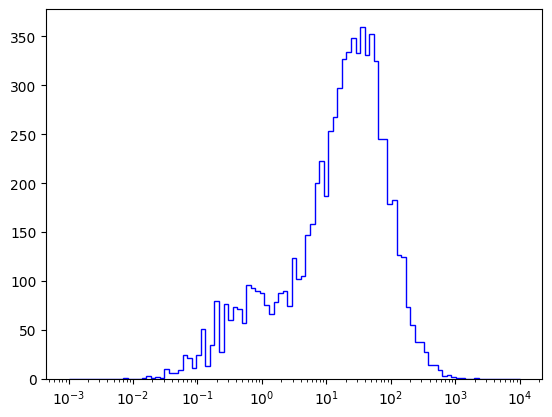

In [170]:

plt.semilogx()
plt.hist(T90, bins= np.logspace(-3,4,100), range=(0, 1000), histtype='step', color='blue', label='T90 Distribution')

cluster modes: [30.51392747  0.93954224]


[]

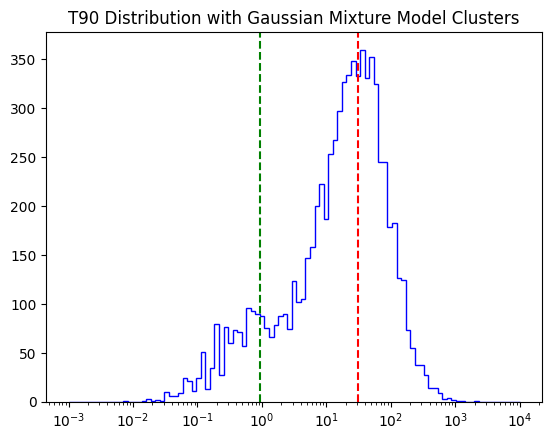

In [171]:
T90=np.array(data[6],dtype=float)
t90= T90[T90 >= 0]

T90_log = np.log10(t90[:,np.newaxis])
gmm = GaussianMixture(n_components=2)
gmm.fit(T90_log)
means =10** (gmm.means_.flatten())
print("cluster modes:", means)
plt.hist(T90, bins= np.logspace(-3,4,100), range=(0, 1000), histtype='step', color='blue', label='T90 Distribution')
plt.axvline(means[0], color='red', linestyle='--', label='Cluster 1 Mean')
plt.axvline(means[1], color='green', linestyle='--', label='Cluster 2 Mean')

plt.title('T90 Distribution with Gaussian Mixture Model Clusters')
plt.semilogx()

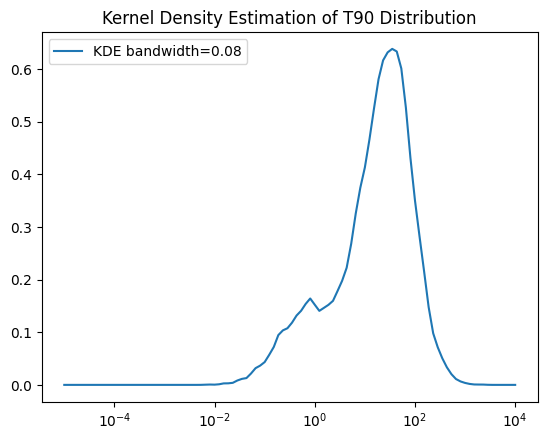

In [172]:
from sklearn.neighbors import KernelDensity
T90=np.array(data[6],dtype=float)
t90= T90[T90 >= 0]

T90_log = np.log10(t90)

def kde_sklearn(data, bandwidth = 0.05):
    kde_skl = KernelDensity(kernel="gaussian", bandwidth = bandwidth)
    kde_skl.fit(data[:, np.newaxis])
    xgrid =np.logspace(-5,4,100)

    log_pdf = kde_skl.score_samples(np.log10(xgrid[:, np.newaxis])) # sklearn returns log(density)
    return np.exp(log_pdf)

xgrid = np.logspace(-5,4,100)
pdf = kde_sklearn(T90_log,bandwidth=0.08)
plt.plot(xgrid,pdf, label='KDE bandwidth=0.08')
# pdf = kde_sklearn(T90,bandwidth=0.08)
# plt.plot(xgrid,pdf, label='KDE bandwidth=0.08')
# plt.hist(T90, bins= np.logspace(-3,4,100), range=(0, 1000), histtype='step', color='green', label='T90 Distribution')

plt.semilogx()

plt.title('Kernel Density Estimation of T90 Distribution')
plt.legend()
plt.show()

In [81]:
from sklearn.model_selection import GridSearchCV

bwrange = np.linspace(0.01,1.0, 40) # Test 30 bandwidths from 0.1 to 1.0
print(bwrange)
K = 5 # Do 5-fold cross validation
grid = GridSearchCV(KernelDensity(), {'bandwidth': bwrange}, cv= K) # Try each bandwidth with K-folds
grid.fit(T90[:, None]) #Fit the histogram data that we started the lecture with.
h_opt = grid.best_params_['bandwidth']
print(h_opt)

[0.01       0.03538462 0.06076923 0.08615385 0.11153846 0.13692308
 0.16230769 0.18769231 0.21307692 0.23846154 0.26384615 0.28923077
 0.31461538 0.34       0.36538462 0.39076923 0.41615385 0.44153846
 0.46692308 0.49230769 0.51769231 0.54307692 0.56846154 0.59384615
 0.61923077 0.64461538 0.67       0.69538462 0.72076923 0.74615385
 0.77153846 0.79692308 0.82230769 0.84769231 0.87307692 0.89846154
 0.92384615 0.94923077 0.97461538 1.        ]
1.0


In [173]:
redshift=np.array(data[11],dtype=float)

fluence=np.array(data[9], dtype=float)
print(redshift)

[-999. -999. -999. ... -999. -999. -999.]


In [174]:

real_fluence=fluence[fluence>=0]
real_redshift=redshift[fluence>=0]

double_real_fluence = real_fluence[real_redshift >= -990]
double_real_redshift = real_redshift[real_redshift >= -990]



[]

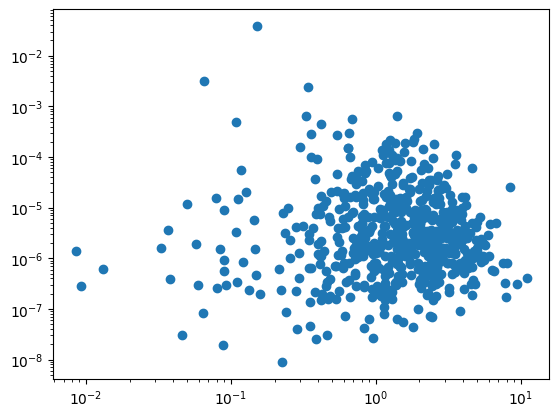

In [175]:
plt.scatter(double_real_redshift[:], double_real_fluence[:])
plt.semilogx()
plt.semilogy()


[[1.20268035e+00 1.21386021e-04]
 [3.89733885e+00 6.20274834e-06]]


Text(0.5, 1.0, 'Clustering output')

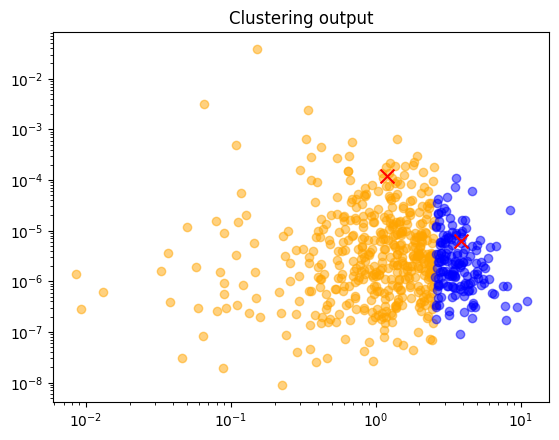

In [167]:
from sklearn.cluster import KMeans
from sklearn import preprocessing

Fluence=double_real_fluence[:,np.newaxis]#reshape fluence
Redshift=double_real_redshift[:, np.newaxis]

from sklearn.cluster import KMeans
from sklearn import preprocessing
nclusters = 2# Number of clusters to find
clf = KMeans(n_clusters=nclusters) 
X = np.hstack((Redshift, Fluence)) 
clf.fit(X)
centers = clf.cluster_centers_ 
print(centers)#location of the clusters
labels = clf.predict(X) #labels for each of the points

# plot the data color-coded by cluster id
colors = ["orange", 'blue', 'green', 'purple', 'cyan', 'magenta']
for ii in range(nclusters):
    plt.scatter(X[labels==ii,0], X[labels==ii,1], 
                color=colors[ii],alpha=0.5)
plt.semilogx()
plt.scatter(centers[:,0], centers[:,1], color='red', marker='x', s=100, label='Cluster Centers')
plt.semilogy()

plt.title('Clustering output')


In [ ]:
from sklearn.cluster import KMeans
from sklearn import preprocessing

Fluence=double_real_fluence[:,np.newaxis]#reshape fluence
Redshift=double_real_redshift[:, np.newaxis]

from sklearn.cluster import KMeans
from sklearn import preprocessing
nclusters = 2# Number of clusters to find
clf = KMeans(n_clusters=nclusters) 
X = np.hstack((Redshift, Fluence)) 
clf.fit(X)
centers = clf.cluster_centers_ 
print(centers)#location of the clusters
labels = clf.predict(X) #labels for each of the points

# plot the data color-coded by cluster id
colors = ["orange", 'blue', 'green', 'purple', 'cyan', 'magenta']
for ii in range(nclusters):
    plt.scatter(X[labels==ii,0], X[labels==ii,1], 
                color=colors[ii],alpha=0.5)
plt.semilogx()
plt.scatter(centers[:,0], centers[:,1], color='red', marker='x', s=100, label='Cluster Centers')
plt.semilogy()

plt.title('Clustering output')